In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to create a "occasionally dishonest casino" state machine.
def actual_output(step):
    x = np.zeros(step)
    z = np.zeros(step)
    for j in range(int(step/5)):
        z[5*j:5*(j+1)] = np.array(random.choices(population=[1,0],weights=[0.3,0.7],k=1))
    z[0] = 0     # initialized with fair
    for i in range(step):
        if z[i] == 1: #means loaded
            x[i] = np.array(random.choices(population=[1,2,3,4,5,6],weights=[0.1, 0.1, 0.1,0.1,0.1,0.5],k=1))
        else: # means fair
            x[i] = np.array(random.choices(population=[1,2,3,4,5,6],weights=[0.167, 0.167, 0.167,0.167,0.167,0.166],k=1))
    return z,x

In [4]:
# Functions for forward and backward algorithm on the state machine to create MAP estimate of state distribution.
def forward(step,x):
    e_F = np.ones(6)/6
    e_L = np.ones(6)/6
    e_L[0:5] = 0.1
    e_L[5] = 0.5
    p_F = np.zeros(step)
    p_L = np.zeros(step)
    for i in range(step):
        if i == 0:
            p_F[i] = 0.7
            p_L[i] = 0.3
        else:
            j = int(x[i])
            p_F_temp = ((p_F[i-1]*0.95)+(p_L[i-1]*0.10))*e_F[j-1]
            p_L_temp = ((p_F[i-1]*0.05)+(p_L[i-1]*0.90))*e_L[j-1]
            p_F[i] = p_F_temp/(p_F_temp+p_L_temp)
            p_L[i] = p_L_temp/(p_F_temp+p_L_temp)
    return  p_F,p_L

def backward(step,p_F,p_L,x):
    up_F = np.zeros(step)
    up_L = np.zeros(step)
    up_F[step-1] = p_F[step-1]
    up_L[step-1] = p_L[step-1]
    e_F = np.ones(6)/6
    e_L = np.ones(6)/6
    e_L[0:5] = 0.1
    e_L[5] = 0.5
    for i in range(step-2,-1,-1):
        j = int(x[i+1])
        up_F_temp = (0.95*e_F[j-1]*up_F[i+1])+(0.10*e_L[j-1]*up_L[i+1])
        up_L_temp = (0.05*e_F[j-1]*up_F[i+1])+(0.90*e_L[j-1]*up_L[i+1])
        up_F[i] = up_F_temp/(up_F_temp+up_L_temp)
        up_L[i] = up_L_temp/(up_F_temp+up_L_temp)
    return up_F,up_L

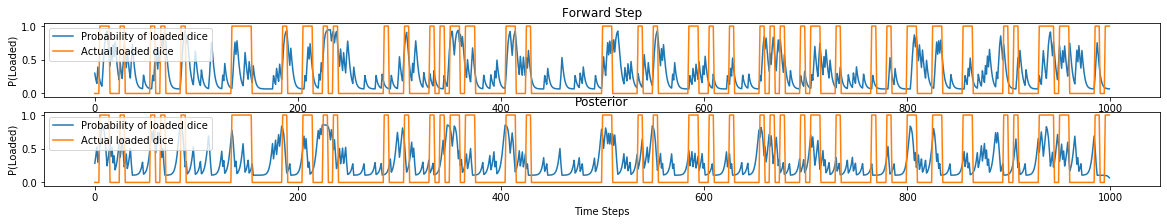

In [10]:
def problem3():
    step = 1000
    z,x = actual_output(step)
    i = range(step)
    plt.plot(i,z)
    p_F,p_L = forward(step,x)
    plt.subplot(2, 1, 1)
    plt.title('Forward Step')
    plt.plot(i,p_L)
    plt.plot(i,z)
    plt.xlabel('Time Steps')
    plt.ylabel('P(Loaded)')
    plt.legend(('Probability of loaded dice', 'Actual loaded dice'),
           loc='upper left', shadow=False)
    up_F,up_L= backward(step,p_F,p_L,x)
    plt.subplot(2, 1, 2)
    plt.rcParams["figure.figsize"] = (10,3)
    plt.title('Posterior')
    plt.plot(i,up_L,label = 'Probability of loaded dice')
    plt.plot(i,z,label = 'Actual loaded dice')
    plt.xlabel('Time Steps')
    plt.ylabel('P(Loaded)')
    plt.legend(('Probability of loaded dice', 'Actual loaded dice'),
           loc='upper left', shadow=False)
    plt.show()
    
problem3()